In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/Cardiotocographic.csv")

In [ ]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


**Dataset:**
* **LB** - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
* **AC** - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
* **FM** - May indicate "Fetal Movements" detected by the monitor.
* **UC** - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
* **DL** - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
* **DS** - May represent "Decelerations Short" or decelerations of brief duration.
* **DP** - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
* **ASTV** - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
* **MSTV** - Likely stands for "Mean Value of Short Term Variability" in the FHR.
* **ALTV** - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
* **MLTV** - Might indicate "Mean Value of Long Term Variability" in the FHR.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [ ]:
df.shape

(2126, 14)

In [ ]:
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [ ]:
for i in df.columns:
    df[i].fillna(df[i].mean() , inplace = True) # fillinf null values in mean value

In [ ]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [ ]:
df[df.duplicated()] #finding duplicate values in df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


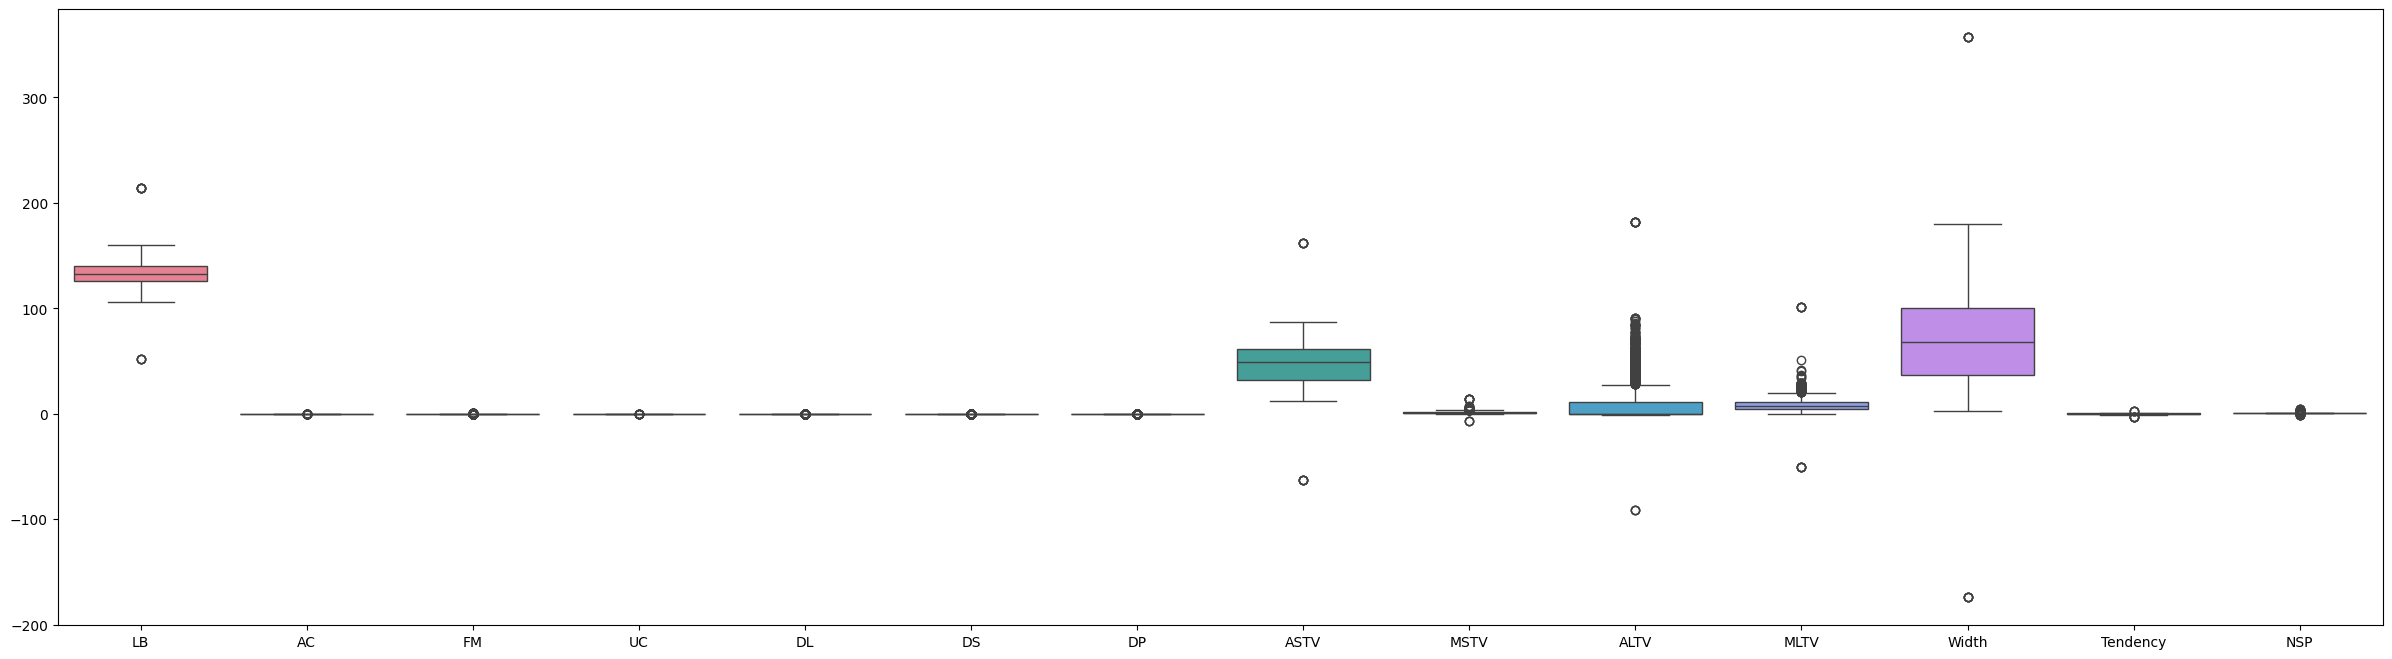

In [ ]:
plt.figure(figsize = (30, 8))
sns.boxplot(df)
plt.show()

In [ ]:
def outlier_filter(df):
    outliers = pd.DataFrame() #Creating a dataframe for append the outliers to it
    for i in df.columns:
        q1 = df[i].quantile(0.25) #Calculating the first quantile
        q3 = df[i].quantile(0.75) #Calculating the second quantile

        IQR = q3 - q1 #Calculating the IQR value

        lower_bound = q1 - (IQR * 1.5) #Calculating lower bound value
        upper_bound = q3 + (IQR * 1.5) #Calculating upper bound value

        outliers_data = df[(df[i]<lower_bound) | (df[i]>upper_bound)] #find the outliers in the dataset
        outliers = pd.concat([outliers, outliers_data]) #Append the value to outliers dataframe

    return outliers #Get the dataset which contains outliers in the dataset

outliers = outlier_filter(df)
cardio_outliers = outliers.drop_duplicates().reset_index().drop('index',axis=1) #Create a separate dataframe for outliers by droping duplicates
cardio_outliers


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,52.0,0.001590,0.000000,0.029851,0.000000,0.000000,0.000003,58.000000,0.500000,0.0,7.9,44.000000,1.0,1.000000
1,214.0,0.000000,0.000000,0.001595,0.001595,0.000000,0.000000,71.000000,0.300000,17.0,5.8,15.000000,0.0,2.000000
2,214.0,0.002469,0.002469,0.002469,0.000000,0.000004,0.000000,35.000000,1.798149,0.0,24.7,118.000000,1.0,1.000000
3,214.0,0.005181,0.012953,0.002591,0.000000,0.000000,0.000000,39.442226,1.600000,0.0,10.0,136.000000,0.0,0.991200
4,52.0,0.000834,0.013344,0.000000,0.000000,0.000000,0.000000,53.000000,0.700000,8.0,12.0,77.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,133.0,0.000000,0.001261,0.007563,0.000000,0.000000,0.000000,69.945069,2.000000,6.0,2.5,68.000000,0.0,1.013864
1239,136.0,0.000000,0.001280,0.007682,0.001280,0.000000,0.000000,67.000000,1.900000,0.0,5.3,44.680341,1.0,0.989862
1240,140.0,0.000775,0.000000,0.006979,0.000000,0.000000,0.000000,78.000000,0.400000,22.0,7.1,66.000000,1.0,2.000000
1241,140.0,0.000980,0.000000,0.006863,0.000000,0.000000,0.000000,79.000000,0.400000,20.0,6.1,67.000000,1.0,1.990464


In [ ]:
data = df[~df.index.isin(outliers.index)] #Creating dataframe by removing the outliers in the dataset
cardio = data.reset_index().drop('index',axis=True)
cardio

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,132.000000,0.006380,0.00000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
1,133.000000,0.003322,0.00000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
2,131.948232,0.006515,0.00000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
3,114.000000,0.004559,0.00000,0.004559,0.003040,0.0,0.0,24.0,3.2,0.000000,16.2,134.0,0.000000,1.0
4,144.000000,0.008143,0.00000,0.006595,0.000000,0.0,0.0,33.0,1.1,-0.060411,6.2,100.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,136.000000,0.000000,0.00207,0.008282,0.000000,0.0,0.0,67.0,1.5,11.000000,4.7,38.0,0.000000,1.0
879,140.000000,0.000000,0.00000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
880,140.000000,0.000000,0.00000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
881,140.000000,0.000000,0.00000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0


In [ ]:
cardio_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        1243 non-null   float64
 1   AC        1243 non-null   float64
 2   FM        1243 non-null   float64
 3   UC        1243 non-null   float64
 4   DL        1243 non-null   float64
 5   DS        1243 non-null   float64
 6   DP        1243 non-null   float64
 7   ASTV      1243 non-null   float64
 8   MSTV      1243 non-null   float64
 9   ALTV      1243 non-null   float64
 10  MLTV      1243 non-null   float64
 11  Width     1243 non-null   float64
 12  Tendency  1243 non-null   float64
 13  NSP       1243 non-null   float64
dtypes: float64(14)
memory usage: 136.1 KB


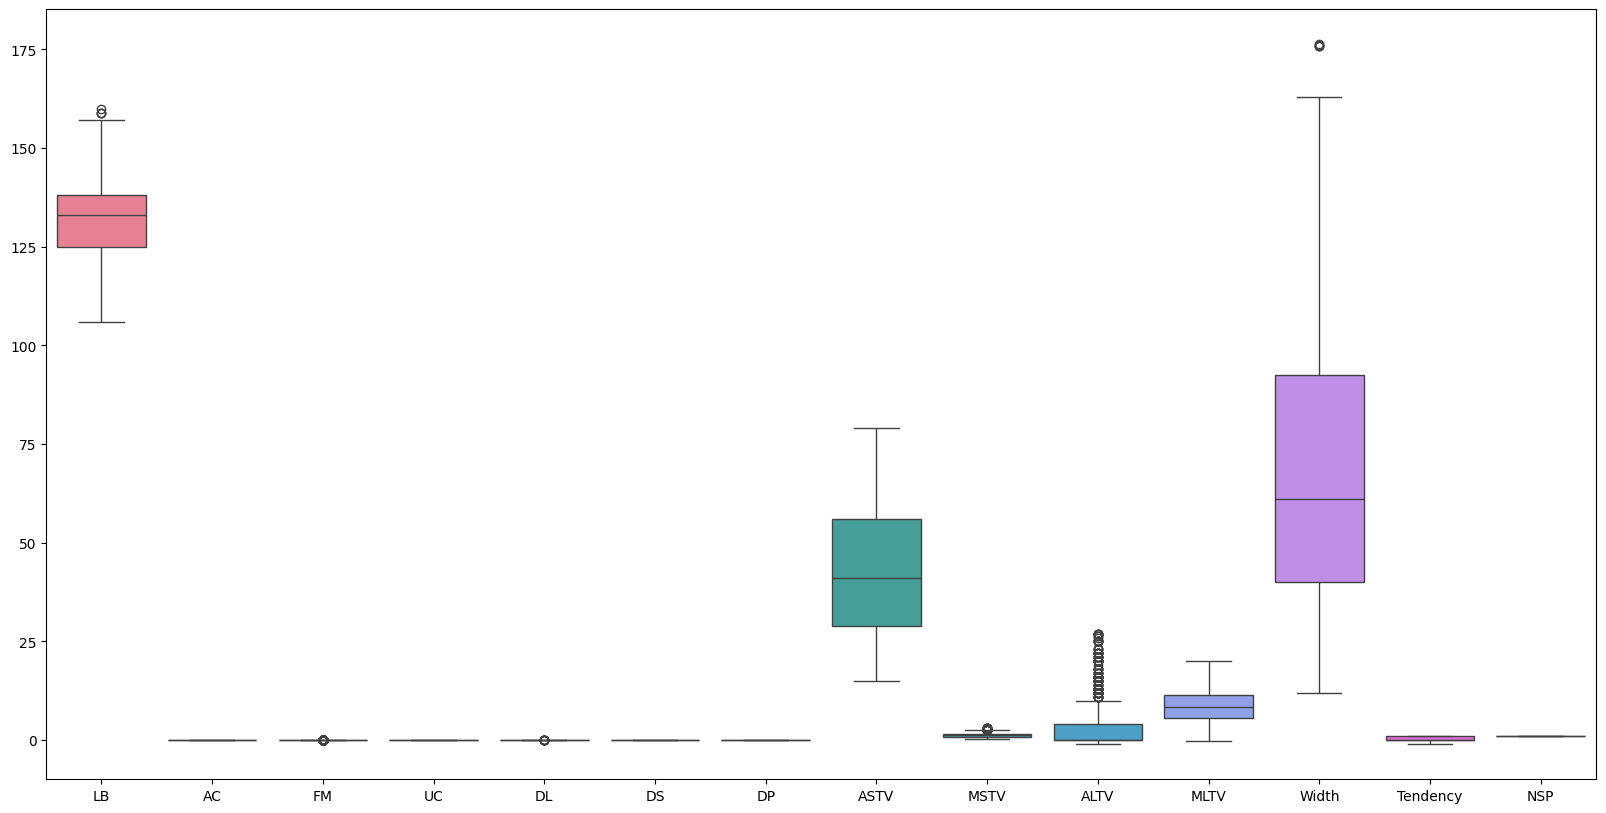

In [ ]:
plt.figure(figsize =(20,10))
sns.boxplot(cardio)
plt.show()

In [ ]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


# **Data Visualization**

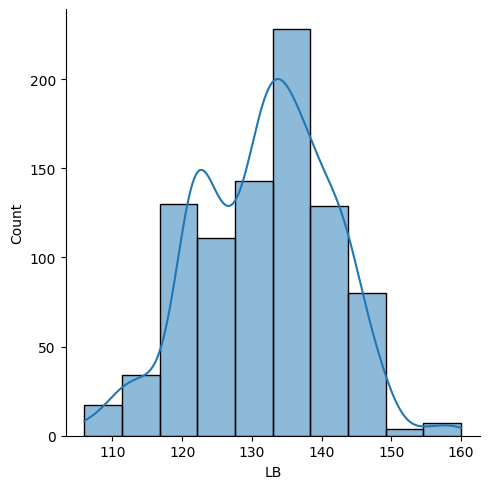

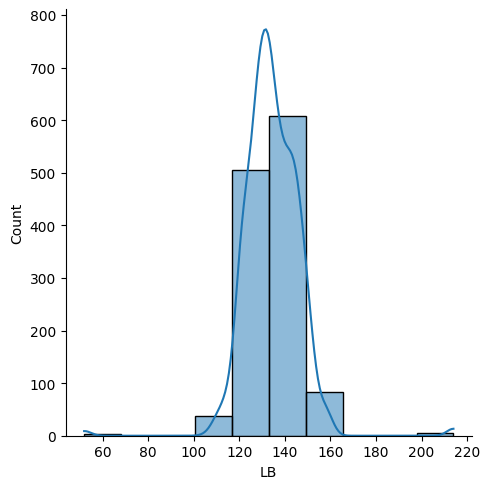

In [ ]:
sns.displot(data=cardio,x='LB',bins=10,kde=True) #Creating histogram using seaborn with 10 bins for LB column of dataset which does not contains outliers
sns.displot(data=cardio_outliers,x='LB',bins=10,kde=True) #Creating histogram using seaborn with 10 bins for LB column of dataset which does not contains outliers
plt.show()

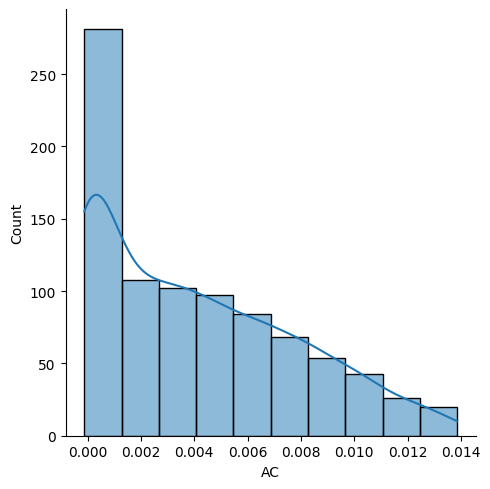

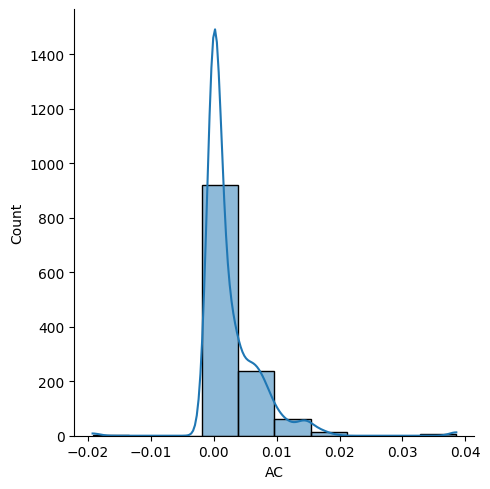

In [ ]:
sns.displot(data=cardio,x='AC',bins=10,kde=True)
sns.displot(data=cardio_outliers,x='AC',bins=10,kde=True)
plt.show()

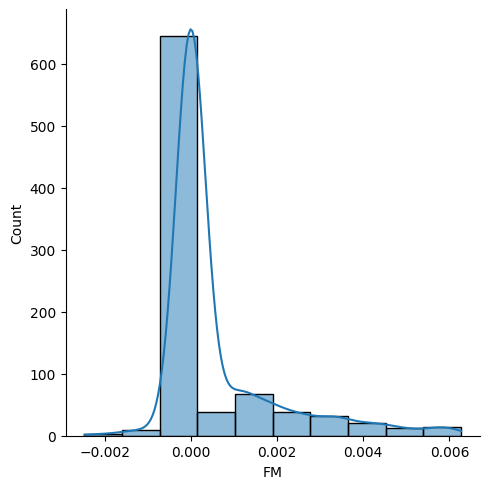

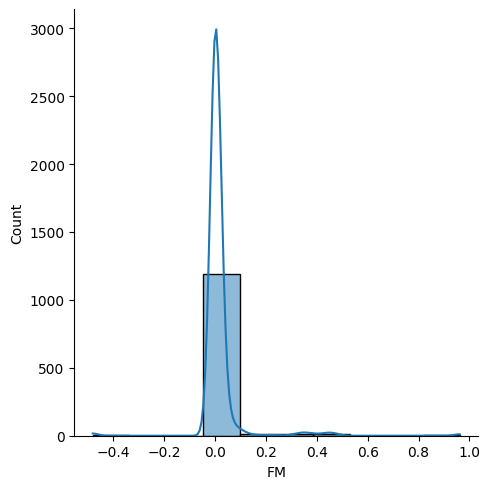

In [ ]:
sns.displot(data=cardio,x='FM',bins=10,kde=True)
sns.displot(data=cardio_outliers,x='FM',bins=10,kde=True)
plt.show()

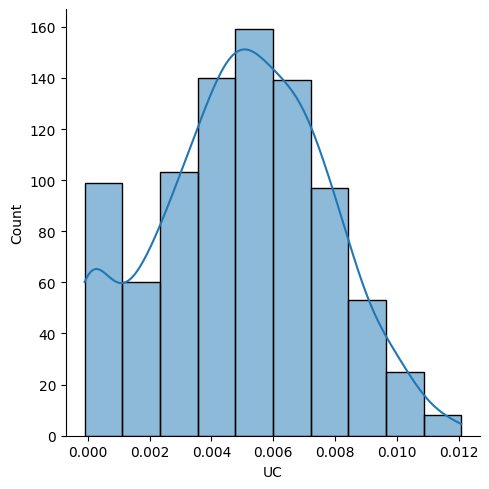

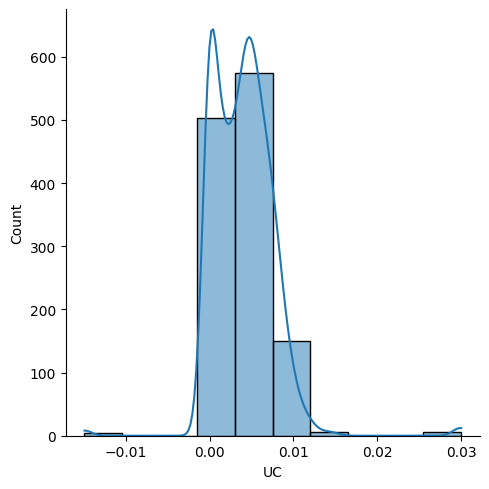

In [ ]:
sns.displot(data=cardio,x='UC',bins=10,kde=True)
sns.displot(data=cardio_outliers,x='UC',bins=10,kde=True)
plt.show()

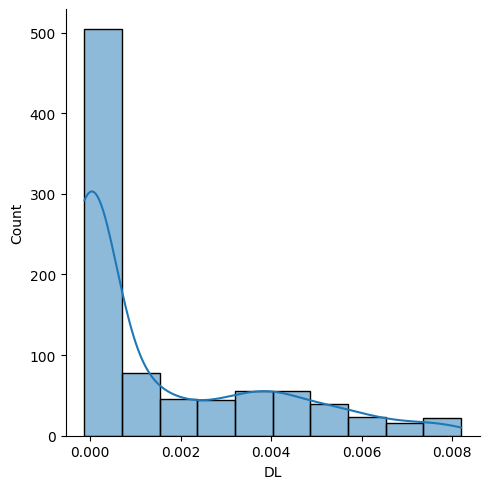

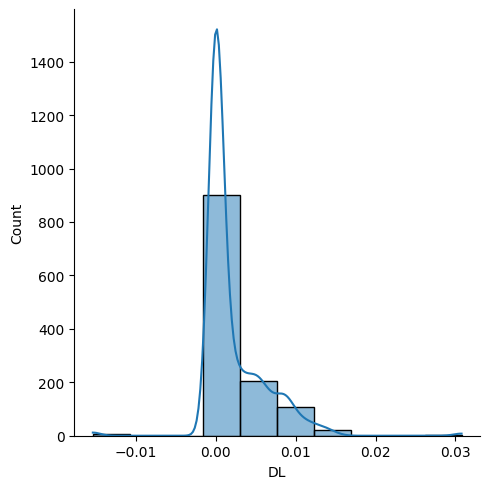

In [ ]:
sns.displot(data=cardio,x='DL',bins=10,kde=True)
sns.displot(data=cardio_outliers,x='DL',bins=10,kde=True)
plt.show()

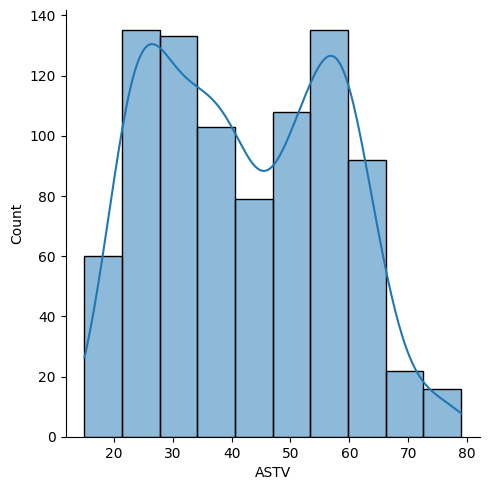

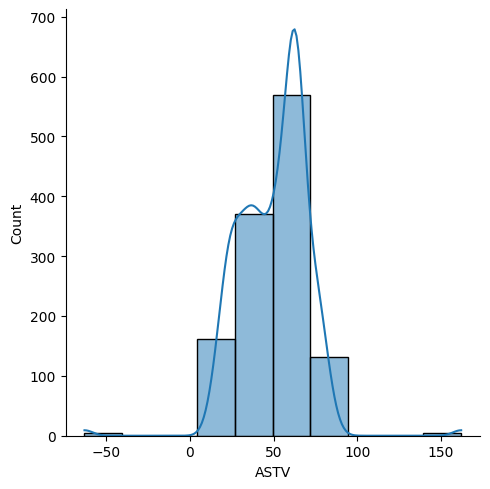

In [ ]:
sns.displot(data=cardio,x='ASTV',bins=10,kde=True)
sns.displot(data=cardio_outliers,x='ASTV',bins=10,kde=True)
plt.show()

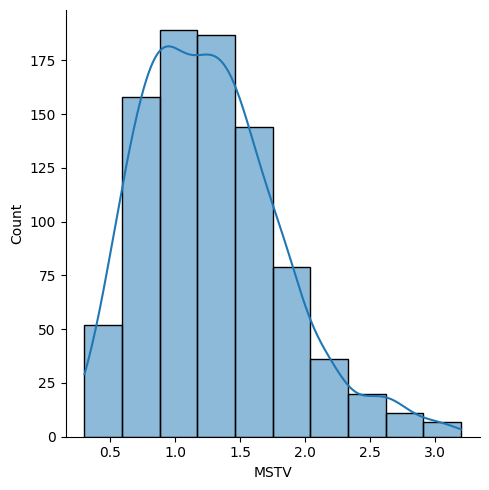

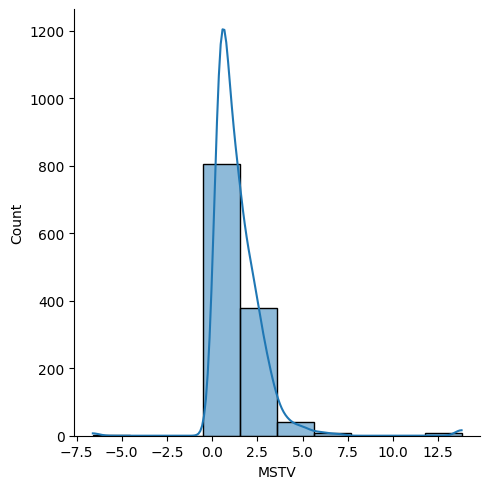

In [ ]:
sns.displot(data=cardio,x='MSTV',bins=10,kde=True)
sns.displot(data=cardio_outliers,x='MSTV',bins=10,kde=True)
plt.show()

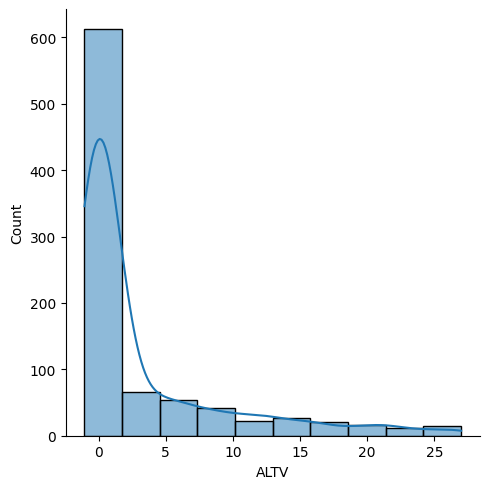

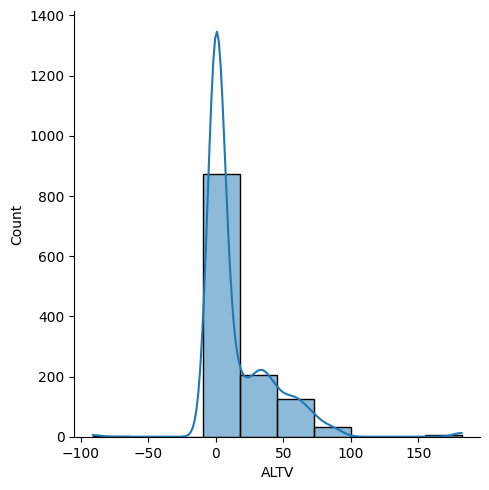

In [ ]:

sns.displot(data=cardio,x='ALTV',bins=10,kde=True)
sns.displot(data=cardio_outliers,x='ALTV',bins=10,kde=True)
plt.show()

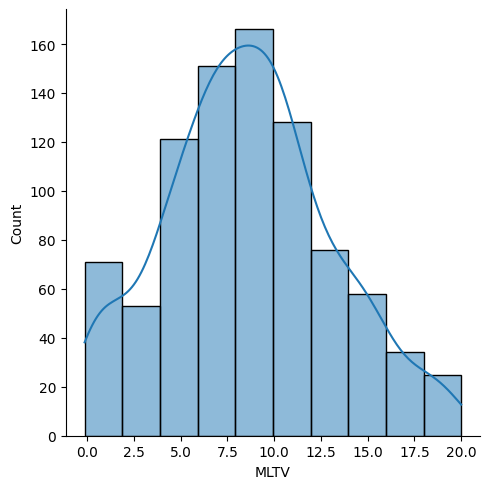

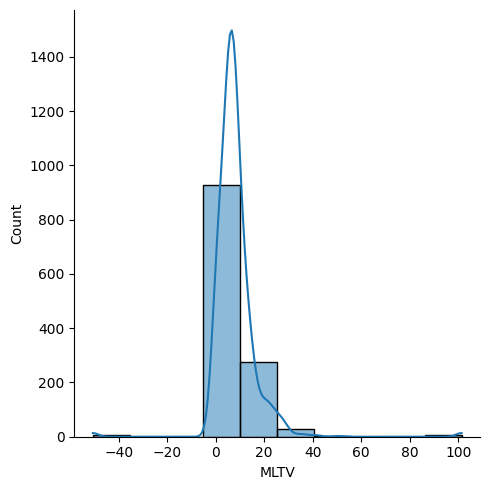

In [ ]:
sns.displot(data=cardio,x='MLTV',bins=10,kde=True)
sns.displot(data=cardio_outliers,x='MLTV',bins=10,kde=True)
plt.show()

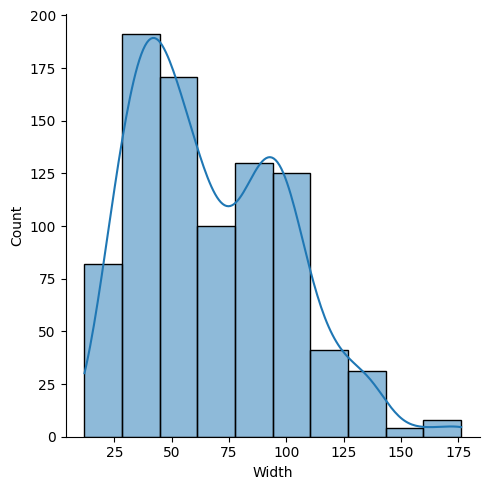

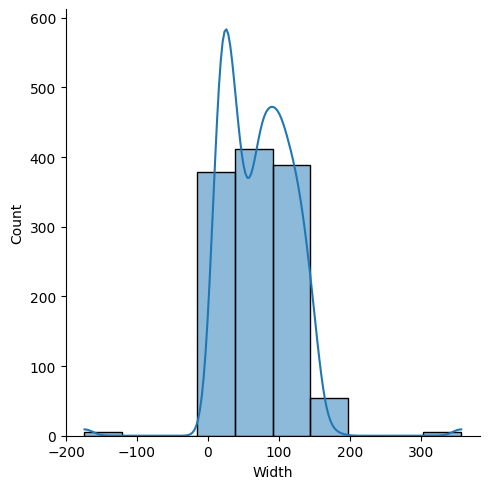

In [ ]:
sns.displot(data=cardio,x='Width',bins=10,kde=True)
sns.displot(data=cardio_outliers,x='Width',bins=10,kde=True)
plt.show()

In [ ]:
corr = cardio.corr().drop(index=['DS','DP','NSP'],columns=['DS','DP','NSP']) #Get corr matrix of dataset. Here I removed the DS,DP,NSP because those contains null values
corr

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency
LB,1.000000,0.079880,0.007221,-0.024043,0.020850,0.263728,-0.258983,0.124994,-0.118409,0.011791,0.315990
AC,0.079880,1.000000,0.082838,0.059763,-0.102355,0.027355,0.157814,-0.328318,-0.401056,0.282449,-0.009248
FM,0.007221,0.082838,1.000000,-0.210594,0.054073,0.362223,0.095904,-0.087823,-0.111782,0.162211,0.055835
UC,-0.024043,0.059763,-0.210594,1.000000,0.179120,-0.004439,0.108714,-0.074660,-0.103585,0.018992,-0.077725
DL,0.020850,-0.102355,0.054073,0.179120,1.000000,-0.001525,0.506833,-0.106325,-0.215279,0.540652,0.312391
ASTV,0.263728,0.027355,0.362223,-0.004439,-0.001525,1.000000,-0.357606,0.146468,-0.331045,0.018016,0.079154
MSTV,-0.258983,0.157814,0.095904,0.108714,0.506833,-0.357606,1.000000,-0.333940,-0.006386,0.545244,0.060625
ALTV,0.124994,-0.328318,-0.087823,-0.074660,-0.106325,0.146468,-0.333940,1.000000,-0.063275,-0.216387,0.005426
MLTV,-0.118409,-0.401056,-0.111782,-0.103585,-0.215279,-0.331045,-0.006386,-0.063275,1.000000,-0.034890,-0.028150
Width,0.011791,0.282449,0.162211,0.018992,0.540652,0.018016,0.545244,-0.216387,-0.034890,1.000000,0.284289


In [ ]:
corr1 = cardio_outliers.corr()
corr1

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.099985,0.006827,-0.205256,-0.188858,-0.008576,-0.082648,0.209148,-0.170941,0.212068,0.031970,-0.176276,0.206830,0.113720
AC,-0.099985,1.000000,0.034311,0.045580,-0.074147,-0.037392,-0.067244,-0.300059,0.152439,-0.248217,-0.037432,0.234489,0.045653,-0.327940
FM,0.006827,0.034311,1.000000,-0.042429,-0.000907,0.028354,0.103095,-0.071411,0.009444,-0.047636,-0.001679,0.104443,-0.019181,0.030360
UC,-0.205256,0.045580,-0.042429,1.000000,0.215080,-0.005710,0.115596,-0.216023,0.227482,-0.227738,-0.043860,0.150203,-0.068736,-0.166712
DL,-0.188858,-0.074147,-0.000907,0.215080,1.000000,0.063476,0.146061,-0.116584,0.396731,-0.240357,-0.153064,0.371389,-0.137474,-0.012096
DS,-0.008576,-0.037392,0.028354,-0.005710,0.063476,1.000000,0.001657,0.006416,0.015818,-0.009179,0.037647,0.046085,-0.018549,0.064813
DP,-0.082648,-0.067244,0.103095,0.115596,0.146061,0.001657,1.000000,0.002121,0.114537,-0.137751,-0.118115,0.194222,-0.157750,0.248061
ASTV,0.209148,-0.300059,-0.071411,-0.216023,-0.116584,0.006416,0.002121,1.000000,-0.319469,0.364670,-0.192686,-0.307568,-0.043262,0.444906
MSTV,-0.170941,0.152439,0.009444,0.227482,0.396731,0.015818,0.114537,-0.319469,1.000000,-0.326305,0.036098,0.422950,-0.058921,-0.139005
ALTV,0.212068,-0.248217,-0.047636,-0.227738,-0.240357,-0.009179,-0.137751,0.364670,-0.326305,1.000000,-0.106683,-0.416949,0.058493,0.292239


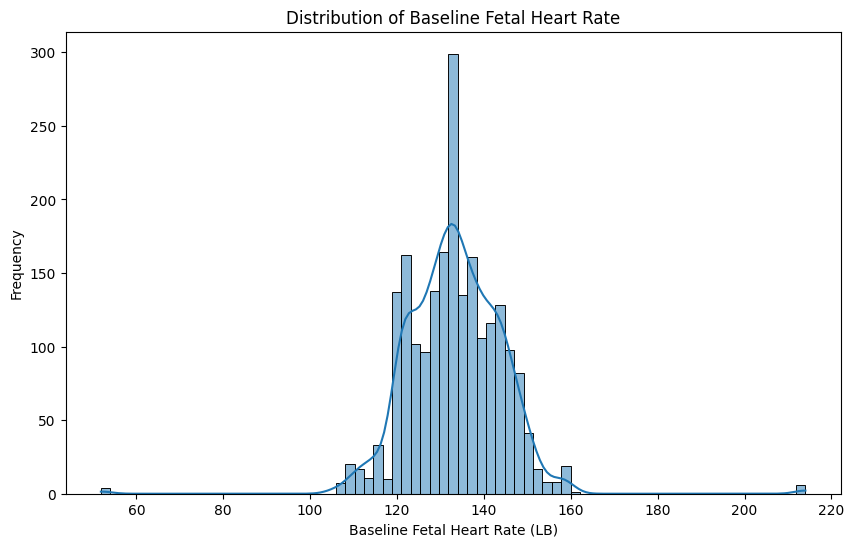

In [ ]:
plt.figure(figsize=(10, 6))# Visualizing the distribution
sns.histplot(df['LB'].dropna(), kde=True)
plt.title('Distribution of Baseline Fetal Heart Rate')
plt.xlabel('Baseline Fetal Heart Rate (LB)')
plt.ylabel('Frequency')
plt.show()



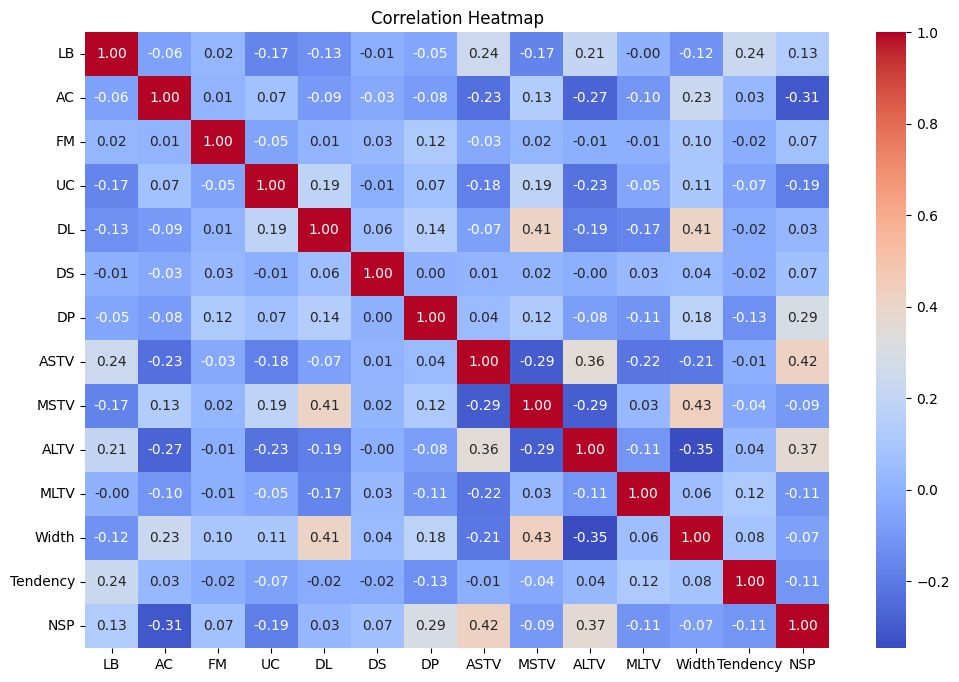

In [ ]:
# Correlation heatmap to explore relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

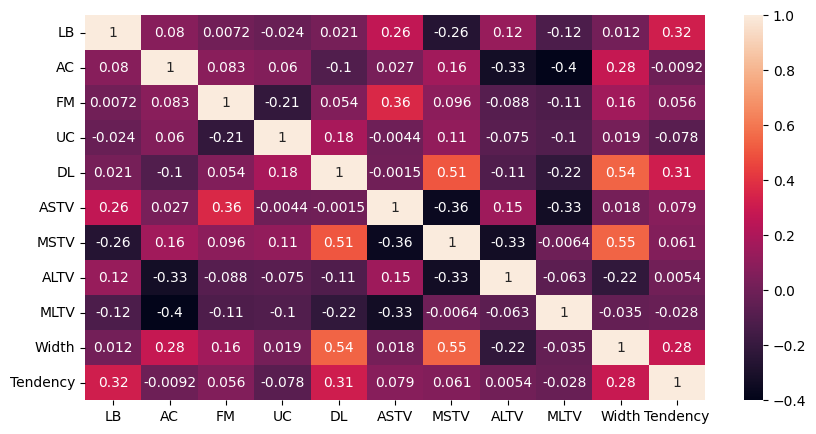

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True) #Ploting heatmap for correlation matrix
plt.show()

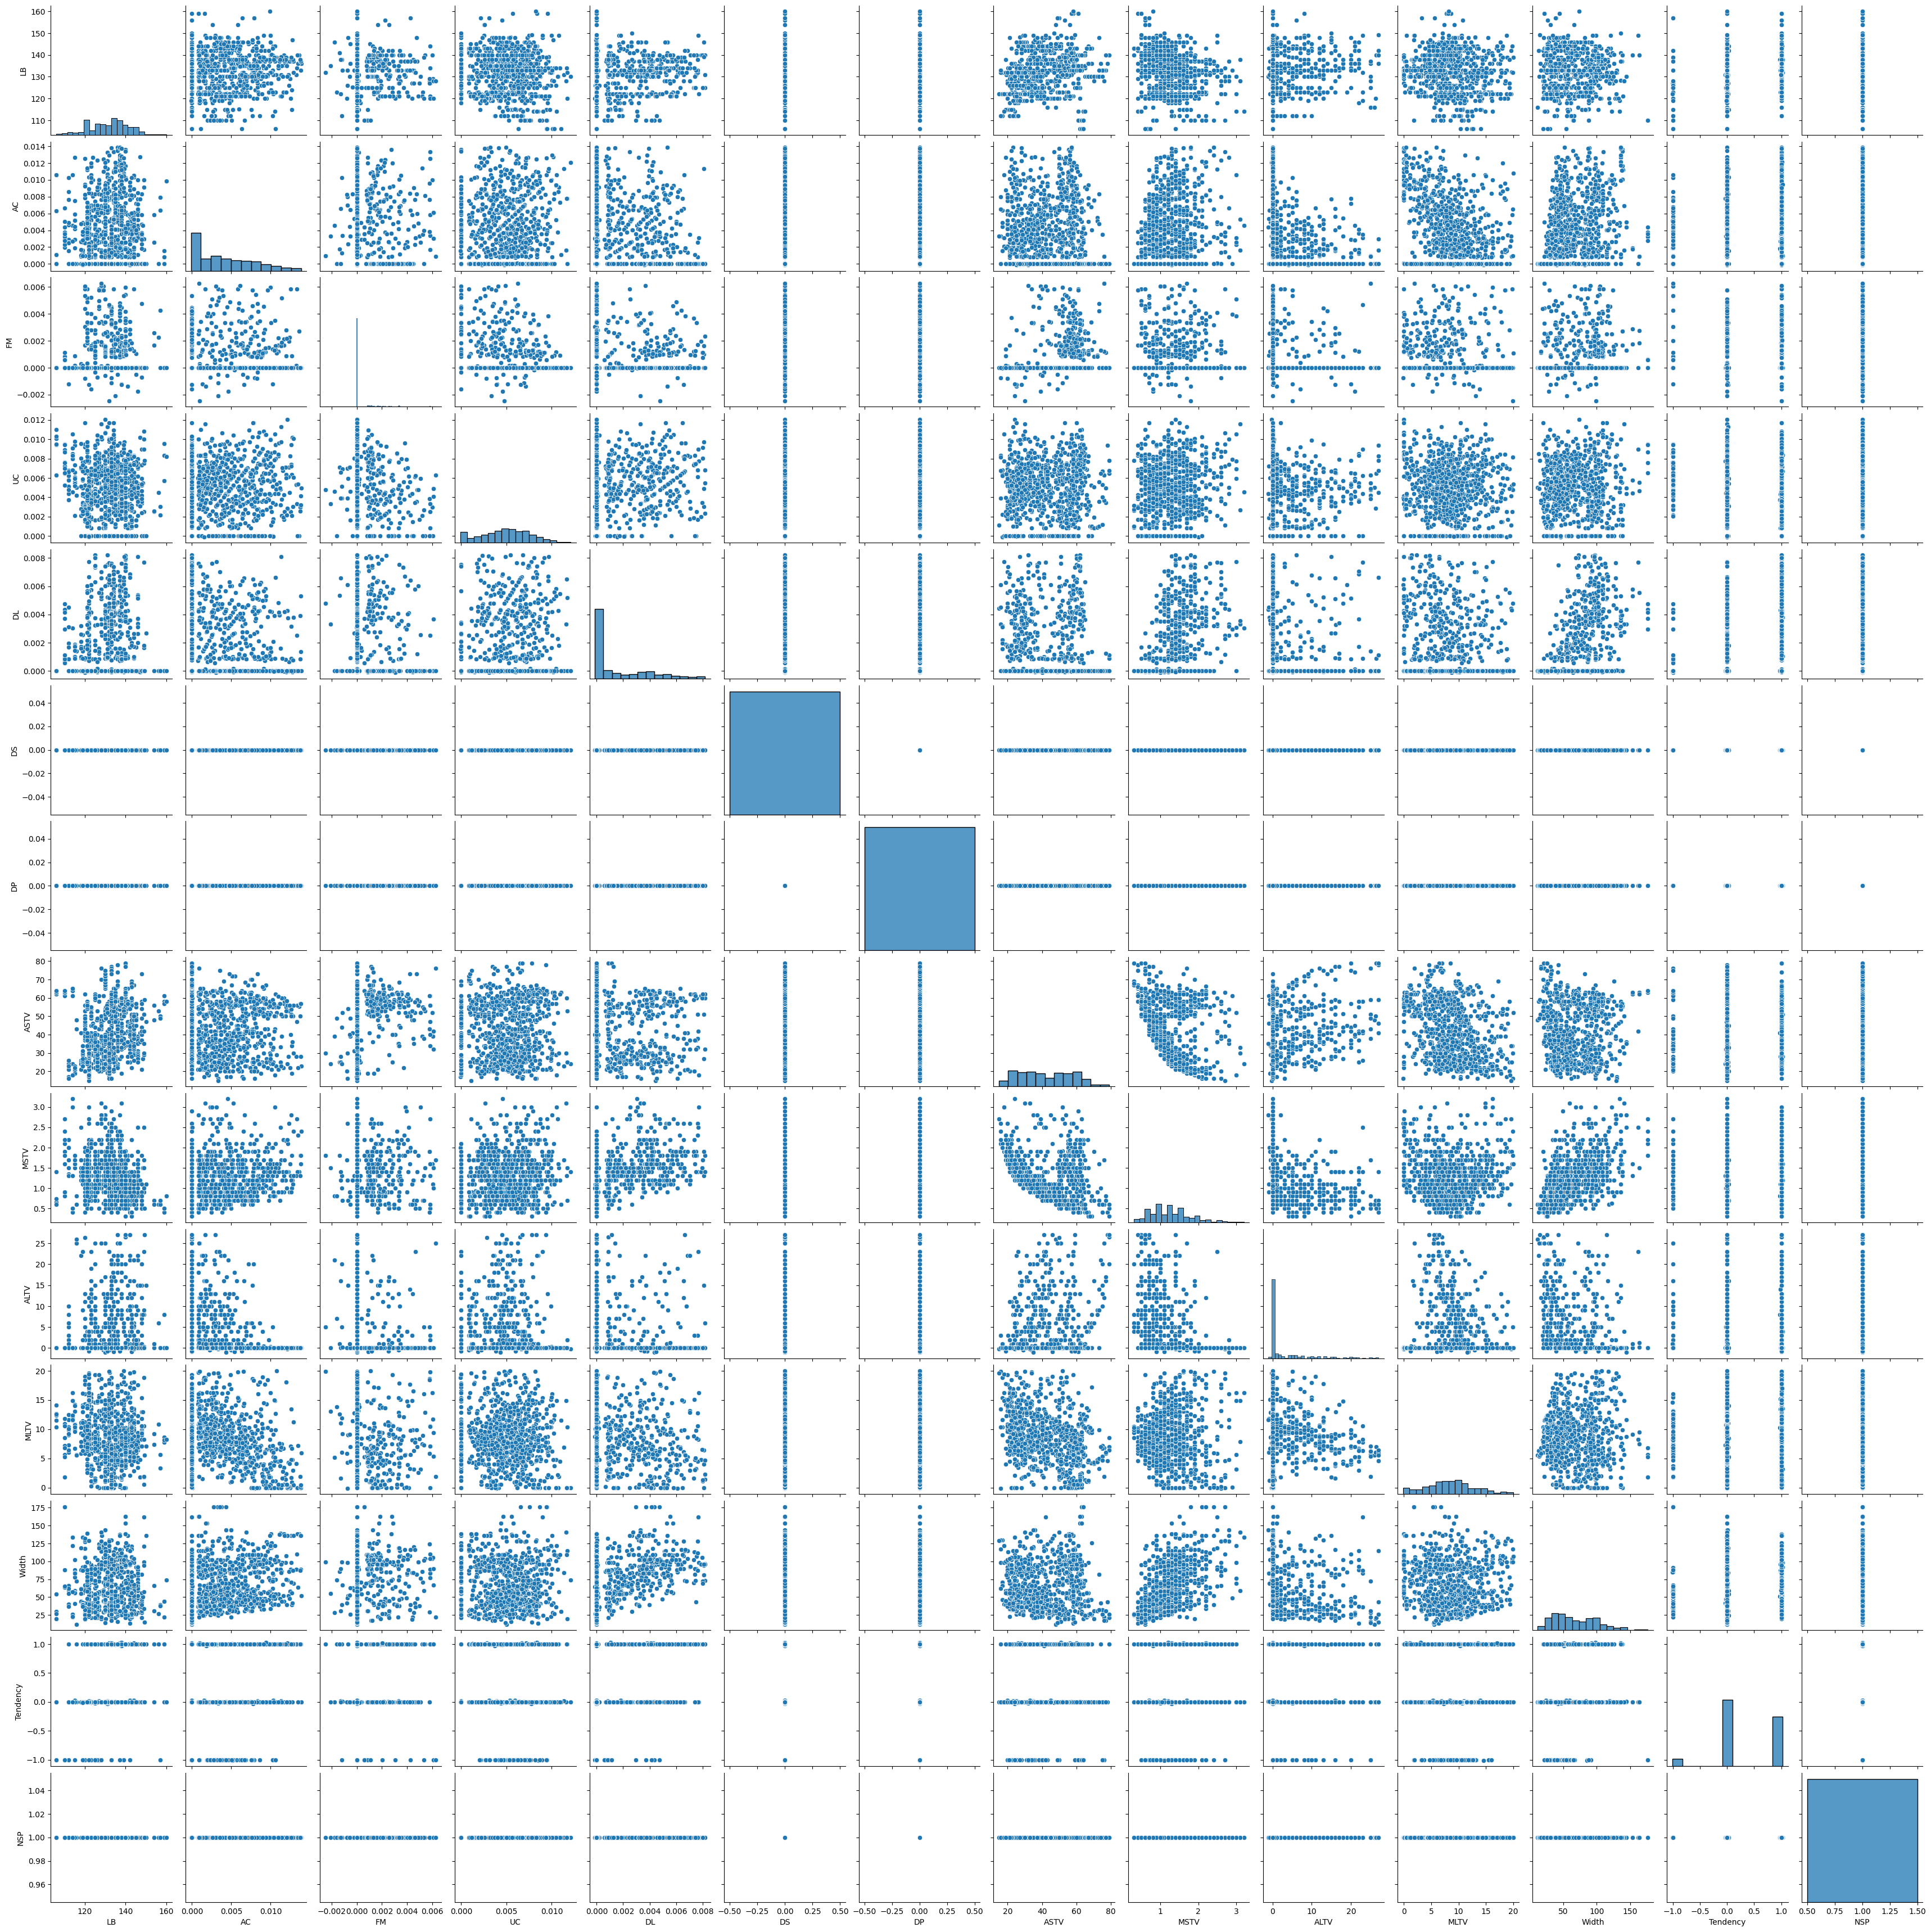

In [ ]:
sns.pairplot(cardio) #Ploting pair plot using seaborn for dataset which does not cointains outliers
plt.show()

**Pattern Recognition and Insights:**

# Key Insights
* **Strongly Correlated :**
* The pair of columns (Width,MSTV), (Width,DL) and (MSTV,DL) are highly correlated with each other with the value 0.54 almost. It indicates that when the value increase one another column value also increases simultaneously.

* **Moderate Correlation :**
* The pair of column (LB,Tendency),(FM,ASTV) and (DL,Tendency) are moderately correlated with each other.

* **Weak Correlation :**
* The columns (MLTV,AC),(ALTV,AC),(MLTV,ASTV),(ALTV,MSTV) are with weak correlation or negative correlation.It indicates that when the value increase in the one column then the value is decrease in the another column


#Conclusion:

#Key Insights:
**Distribution Characteristics:**

*Many variables exhibit skewness, indicating non-normal distributions. Variables such as 'AC', 'FM', and 'NSP' show significant skewness, suggesting that they may require transformations for certain statistical analyses.

**Correlation Patterns:**

*Strong positive correlations were identified between variables like MSTV and DL, as well as Width and MSTV. These relationships suggest that certain measures of variability are closely related.

**Variable Importance:**

*The 'LB' variable has a wide range, indicating variability in fetal heart rates across observations. This could be critical for assessing fetal well-being.

**Potential Redundancies:**

*High correlations between certain variables suggest redundancy, which could be considered in model development to avoid multicollinearity.



# Further Analyses:

**Clinical Monitoring:**

Understanding the relationships between different cardiotocographic measures can enhance clinical decision-making in fetal monitoring. For instance, recognizing that higher short-term variability correlates with abnormal long-term variability can help clinicians identify at-risk fetuses more effectively.

**Predictive Modeling:**

The insights gained from the correlation analysis can inform the selection of features for predictive models. Variables that are strongly correlated with outcomes of interest can be prioritized in model development.

**Data Transformation:**

The non-normal distributions of several variables suggest that data transformations may be necessary to meet the assumptions of parametric statistical tests.